<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB01/LAB01_Ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descarga de vacunaciones.csv

In [24]:
import requests
import pandas as pd

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/vacunaciones.csv"

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
    with open('vacunaciones.csv', 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Cargar el archivo CSV en un DataFrame de pandas
ds = pd.read_csv('vacunaciones.csv')

ds.head(3)

Archivo descargado exitosamente.


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Veamos de qué tipo es cada columna del DataFrame

In [25]:
print(ds.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object


Ordenamos las filas por su fecha para que estén en orden cronológico.

In [26]:
# Convertir la columna de fecha a formato datetime
ds['date'] = pd.to_datetime(ds['date'])

# Ordenar los datos por fecha
ds = ds.sort_values(by='date')

Y ahora ordenamos por país

In [27]:
# Ordenar las filas por país y fecha
ds = ds.sort_values(by=['country', 'date'])

ds.head(3)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


# 1.
Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

Como las filas ya están ordenadas por país y fecha, simplemente hay que tomar la media de las 3 entradas anteriores a un NaN

In [30]:
# creo una copia de ds para modificarla sin afectar al original
df = ds.copy()
id(df), id(ds)

(135545528295552, 135545528297952)

Este funciona pero no hace bien el cambio de pais la media

In [29]:
# Iterar sobre los NaN y calcular la media de los tres valores anteriores
for i, row in df.iterrows():
    if pd.isna(row['people_vaccinated']):
        start_index = max(0, i - 3)  # Índice de inicio para calcular la media
        end_index = i  # Índice final para calcular la media
        mean_value = df.iloc[start_index:end_index]['people_vaccinated'].mean()
        df.at[i, 'people_vaccinated'] = mean_value

Este es el bueno

In [31]:
# Iterar sobre los NaN y calcular la media de los tres valores anteriores
for i, row in df.iterrows():
    if pd.isna(row['people_vaccinated']):
        # Para las entries que van de 0 a 2 (quedaria negativo al restar 3)
        start_index = i
        # Para que la primera entry de un pais no utilice datos del pais anterior
        for j in range(3):
          if i>1 and row['country'] == df.at[start_index-j, 'country']:
            start_index = start_index-1  # Índice de inicio para calcular la media

        end_index = i  # Índice final para calcular la media
        mean_value = df.iloc[start_index:end_index]['people_vaccinated'].mean()
        df.at[i, 'people_vaccinated'] = mean_value

In [32]:
cantidad_nan = df['people_vaccinated'].isna().sum()  # Reemplaza 'nombre_de_columna' con el nombre de la columna que deseas verificar

In [33]:
cantidad_nan

1

In [34]:
df.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.000000,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.000000,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.000000,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.000000,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.000000,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.000000,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.000000,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.000000,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.000000,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
# Calcular la media de los tres valores anteriores y rellenar NaN con esa media
# df['people_vaccinated'] = df['people_vaccinated'].fillna(df['people_vaccinated'].rolling(4, min_periods=0).mean()) # Ventana de 4
# min_periods =  number of observations in window required to have a value
# df.head(30)

Comprobamos que se hayan modificado los valores NaN correctamente

In [35]:
if df['people_vaccinated'].isna().any():
    print("Hay valores NaN en la columna.")
else:
    print("No hay valores NaN en la columna.")

Hay valores NaN en la columna.


# 2.
De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.


In [36]:
# Agrupar por nombre y contar las entradas para cada uno
conteo = df.groupby('country').size()
conteo = conteo.sort_values(ascending=False)

Vemos los países con más entries, ya que cada entry es un día de vacunación en un país.

In [48]:
top_5 = conteo[:5]
print(top_5.dtypes)

int64


In [49]:
top_5

country
Wales               64
England             64
Scotland            64
Northern Ireland    64
United Kingdom      64
dtype: int64

Nos damos cuenta de que `United Kingdom` está compuesto por `Wales`, `England`, `Scotland`, `Northern Ireland`. Vamos a ver si los datos coinciden. Ya que en caso afirmativo, sería una variable dependiente (la suma de los países que lo componen) y no aporta información nueva.

In [ ]:
df[df['country'] == top_5[:4]]

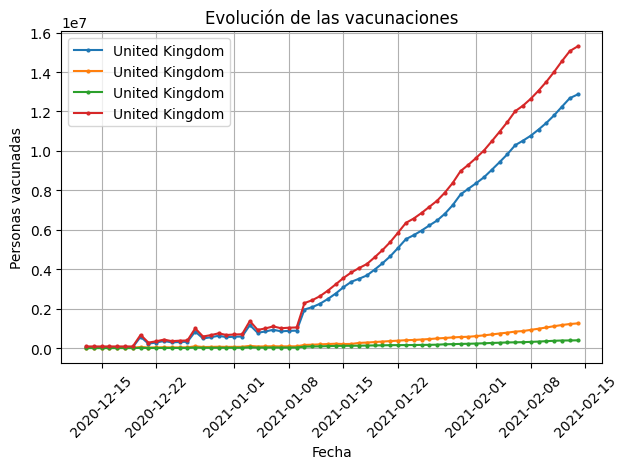

In [44]:
import matplotlib.pyplot as plt
for pais in top_5[1:5].index:
  top5 = df[df['country'] == pais]

  # Crear el gráfico de líneas
  plt.plot(top5['date'], top5['people_vaccinated'], marker='o', linestyle='-', markersize=2)
  plt.legend(top5['country'])
# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
# Leyenda

plt.show()

In [22]:
England = ds[ds['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.0,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,NaN,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.0,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,NaN,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,NaN,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


In [23]:
England = df[df['country'] == 'England']
England.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
880,England,NaN,2020-12-13,55389.0,55389.000000,NaN,NaN,NaN,0.10,0.10,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
881,England,NaN,2020-12-14,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
882,England,NaN,2020-12-15,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
883,England,NaN,2020-12-16,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
884,England,NaN,2020-12-17,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
885,England,NaN,2020-12-18,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
886,England,NaN,2020-12-19,NaN,55389.000000,NaN,NaN,74067.0,NaN,NaN,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
887,England,NaN,2020-12-20,573858.0,573858.000000,NaN,NaN,74067.0,1.02,1.02,NaN,1316.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
888,England,NaN,2020-12-21,NaN,228212.000000,NaN,NaN,68942.0,NaN,NaN,NaN,1225.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
889,England,NaN,2020-12-22,NaN,285819.666667,NaN,NaN,63817.0,NaN,NaN,NaN,1134.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


Graficamos la evolución en el tiempo de ellos.

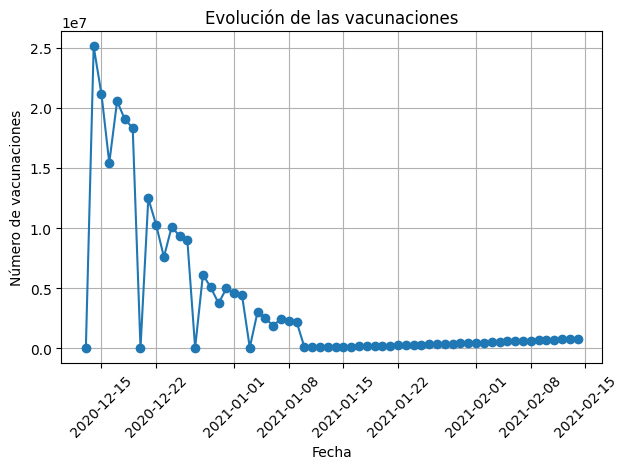

In [ ]:
import matplotlib.pyplot as plt
# Crear el gráfico de líneas
plt.plot(wales['date'], wales['people_vaccinated'], marker='o', linestyle='-')

# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Número de vacunaciones')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()